In [101]:
import numpy as np
from matplotlib import pyplot, animation
from IPython.display import HTML
import ipywidgets
%matplotlib inline

In [135]:
# Set parameters.
nx = 41  # number spatial grid points
L = 2.0  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.3  # viscosity
sigma = 0.49  # CFL limit
dt = sigma * dx**2 / nu  # time-step size
nt = 20  # number of time steps to compute

# Get the grid point coordinates.
x = np.linspace(0.0, L, num=nx)

# Set the initial conditions.
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [136]:
# Integrate in Time
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu * dt / dx**2 * (u[2:] - 2 * u[1:-1] + u[:-2])
    
u_naive = u 

In [137]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2 * un[1:-1] + un[2:])
np.allclose(u_naive, u)

True

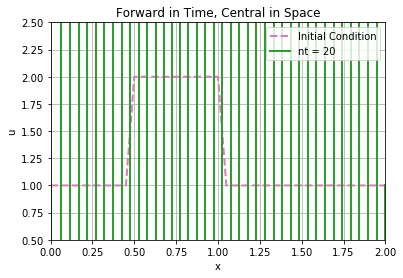

In [129]:
# Plot Solution after nt time steps & IC
pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial Condition', color = 'C6', linestyle='--', linewidth = 2)
pyplot.plot(x, u, label='nt = {}'.format(nt), color='C2', linestyle='-', linewidth=2)
pyplot.title('Forward in Time, Central in Space')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5);
pyplot.legend(loc='upper right');

### Animation Station

In [130]:
# Function Definition for Solution History
def diffuse(u0, sigma=0.5, nt=20):
    """
    Computes numerical solution of 1D Diffusion equation over nt
    """
    
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2*u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist            #returns list of u over time

In [131]:
u_hist = diffuse(u0, sigma=sigma, nt=nt) #where u0 is initial condition

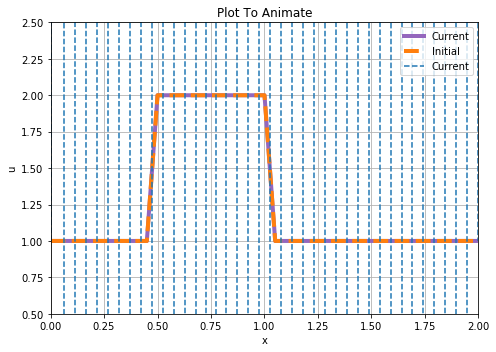

In [132]:
# Plot Creation
fig = pyplot.figure(figsize=(7.0, 5.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.title('Plot To Animate')
line = pyplot.plot(x, u0,
                   color='C4', linestyle='-', linewidth=4, label='Current')[0]
pyplot.plot(x, u_hist[0], label = 'Initial', color='C1', linestyle = '--', linewidth = 4)
pyplot.plot(x, u_hist[n], label = 'Current', color='C0', linestyle = '--')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
pyplot.legend()
fig.tight_layout()

In [133]:
# Update Plot Function
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

In [134]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist,),
                               interval=100)

In [84]:
def # Display the video.
HTML(anim.to_html5_video())

In [105]:
nt_slider = ipywidgets.IntSlider(value = 0, min=0, max=nt, step=1, description='Time Step')

w = ipywidgets.interactive(plot_solution, n=nt_slider,u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

NameError: name 'plot_solution' is not defined

In [104]:
display(w)

interactive(children=(IntSlider(value=0, description='Time Step', max=20), Output()), _dom_classes=('widget-in…